[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/08_monte_carlo/fishtank_full.ipynb)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def fishtank_sim(nsim=5000, nweeks=104, a=1./7, days_for_delivery=5, 
                 fixed_delivery=7, saleprofit=20, lostloss=10, 
                 overstockloss=0.5):
    """Main function to simulate the fishtank problem

    Args:
        nsim (int): number of different simulations to do
        nweeks (int): number of weeks in each simulation
        a (float): probability of a customer each day
        days_for_delivery (int): days from order to delivery of new tanks
        fixed_delivery (int): standing order for a new tank every so many days
        saleprofit (float): profit from selling one tank
        lostloss (float): loss from losing a customer
        overstockloss (float): cost of each tank overstock per night

    Returns:
        profit (numpy.ndarray): total profit for each simulation
        fraction_served (numpy.ndarray): fraction of customers served in each simulation
        
    """
    
    order_when_out = 0    # order a new tank when stock = 0
    
    profit = np.zeros(nsim)
    fraction_served = np.zeros(nsim)
    
    # Print column headings
    # Uncomment to display texts
    # print('customers  sold  lost  fraction_served  overstock  end_stock  profit')
    
    for sim in range(nsim): 
        
        # Initialize
        total_cust = 0
        total_sold = 0
        total_lost = 0 
        stock = 1 # number of tanks in stock 
        deliv = -1 # number of days until delivery of tank on order 
                   # -1 means none on order 
        overstock = 0 # increment every night by number of excess tanks in stock 
        
        # Main loop for single simulation 
        day = 0
        
        for week in range(1, nweeks + 1): 
            for weekday in range(1, 8):
                day += 1 # day in the simulation 
                sold = 0
                lost = 0 
            
                # A new tank is delivered
                if deliv == 0: 
                    stock += 1   
            
                # Days until next delivery 
                if deliv >= 0: 
                    deliv -= 1
                
                # A new tank is delivered every so many days regardless of stock 
                if (7 * week + day) % fixed_delivery == 1: 
                    stock += 1
                    
                # Generate random number from uniform distribution 
                random_num = np.random.uniform()

                # Use random number to decide how many customers arrived 
                if random_num < a: 
                    customers = 1
                
                    # We have a tank to sell to the customer
                    if stock > 0:
                        sold += 1
                        stock -= 1
                            
                    # There are no tanks for the customer 
                    else: 
                        lost += 1
    
                else: 
                    customers = 0 
                
                # None in stock and none on order
                if (order_when_out and stock == 0) and (deliv < 0): 
                    # Order another 
                    deliv = days_for_delivery
                
                if stock > 1: 
                    overstock = overstock + (stock - 1)
                
                # Keep track of total statistics 
                total_cust += customers
                total_sold += sold 
                total_lost += lost 
            
        # Fraction served and profit for each simulation 
        fraction_served[sim] = total_sold / total_cust
        profit[sim] = total_sold * saleprofit - (total_lost * lostloss + overstock * overstockloss)
        
        # Output total statistics
        # Uncomment to display texts
        # print('%6.0f %6.0f %8.0f %12.3f %11.0f %8.0f %12.2f' %\
        #       (total_cust, total_sold, total_lost, fraction_served[sim], overstock, stock, profit[sim]))
        
    return profit, fraction_served

In [3]:
# Run simulation 
profit, fraction_served = fishtank_sim()

customers  sold  lost  fraction_served  overstock  end_stock  profit
   115    104       11        0.904        1107        1      1416.50
    99     93        6        0.939        3535       12        32.50
   102     97        5        0.951        2963        8       408.50
   102    102        0        1.000        3273        3       403.50
   108    101        7        0.935        1536        4      1182.00
    88     84        4        0.955        6321       21     -1520.50
    93     92        1        0.989        4653       13      -496.50
   110     98       12        0.891        1379        7      1150.50
    99     97        2        0.980        3234        8       303.00
    92     92        0        1.000        5812       13     -1066.00
   109    103        6        0.945         954        2      1523.00
   112    104        8        0.929         734        1      1633.00
   100     97        3        0.970        1816        8      1002.00
   106     95       1

   107    100        7        0.935        1215        5      1322.50
    93     91        2        0.978        4776       14      -588.00
    82     82        0        1.000        8444       23     -2582.00
    96     93        3        0.969        5629       12      -984.50
   119    105       14        0.882         826        0      1547.00
    95     95        0        1.000        4231       10      -215.50
    89     89        0        1.000        4475       16      -457.50
    98     96        2        0.980        4271        9      -235.50
   116    105       11        0.905         641        0      1669.50
    93     89        4        0.957        5915       16     -1217.50
   116    105       11        0.905        2639        0       670.50
    98     97        1        0.990        4395        8      -267.50
   114    103       11        0.904         929        2      1485.50
   104    104        0        1.000        4815        1      -327.50
   103    101       

    91     89        2        0.978        4278       16      -379.00
   105    103        2        0.981        4206        2       -63.00
   108    102        6        0.944        1582        3      1189.00
    96     96        0        1.000        2363        9       738.50
    96     96        0        1.000        4228        9      -194.00
    98     98        0        1.000        3007        7       456.50
   123     98       25        0.797         903        7      1258.50
    98     96        2        0.980        3258        9       271.00
    95     94        1        0.989        4064       11      -162.00
   102    102        0        1.000        2902        3       589.00
   102    100        2        0.980        1727        5      1116.50
   109    105        4        0.963        1123        0      1498.50
   101     98        3        0.970        3217        7       321.50
   106    100        6        0.943        3587        5       146.50
    91     91       

   108     98       10        0.907        1897        7       911.50
    97     92        5        0.948        3648       13       -34.00
   101    101        0        1.000        2401        4       819.50
   109    100        9        0.917        2140        5       840.00
    90     88        2        0.978        3439       17        20.50
   104     99        5        0.952        2831        6       514.50
   115    103       12        0.896        2207        2       836.50
   113     99       14        0.876        1142        6      1269.00
   129    103       26        0.798         496        2      1552.00
    99     99        0        1.000        3894        6        33.00
   116    104       12        0.897         664        1      1628.00
   104     97        7        0.933        3312        8       214.00
   100     98        2        0.980        3412        7       234.00
   113    104        9        0.920        1024        1      1478.00
   108    100       

   114    100       14        0.877        2423        5       648.50
    86     76       10        0.884        6301       29     -1730.50
   113    102       11        0.903        1994        3       933.00
    95     95        0        1.000        2053       10       873.50
   100     97        3        0.970        2325        8       747.50
    95     92        3        0.968        2721       13       449.50
   104     99        5        0.952        2058        6       901.00
   103    101        2        0.981        2617        4       691.50
    94     94        0        1.000        6536       11     -1388.00
   102     98        4        0.961        3246        7       297.00
    94     92        2        0.979        5847       13     -1103.50
   117    103       14        0.880         781        2      1529.50
   104    104        0        1.000        2170        1       995.00
   122    105       17        0.861         808        0      1526.00
    96     93       

    93     93        0        1.000        5118       12      -699.00
    89     89        0        1.000        9252       16     -2846.00
   113    104        9        0.920         725        1      1627.50
   105     99        6        0.943        2315        6       762.50
   100    100        0        1.000        3551        5       224.50
    94     94        0        1.000        8061       11     -2150.50
   101     97        4        0.960        1928        8       936.00
   114    105        9        0.921         884        0      1568.00
   104    102        2        0.981        1979        3      1030.50
   102    102        0        1.000        5257        3      -588.50
   110    100       10        0.909        1575        5      1112.50
   118    100       18        0.847        1043        5      1298.50
   101     98        3        0.970        4301        7      -220.50
   102     98        4        0.961        3160        7       340.00
   105     99       

    89     86        3        0.966        4347       19      -483.50
   119    104       15        0.874         499        1      1680.50
   108    105        3        0.972        3622        0       259.00
   103    103        0        1.000        2013        2      1053.50
    98     87       11        0.888        3991       18      -365.50
    92     92        0        1.000        6306       13     -1313.00
    97     91        6        0.938        5056       14      -768.00
   108    102        6        0.944        1093        3      1433.50
   118    105       13        0.890        2435        0       752.50
    85     83        2        0.976        6453       22     -1586.50
    90     87        3        0.967       10490       18     -3535.00
   106     97        9        0.915        2781        8       459.50
   116    105       11        0.905         656        0      1662.00
   105    103        2        0.981        2236        2       922.00
   115    101       

   107    101        6        0.944        2581        4       669.50
   116    104       12        0.897        1005        1      1457.50
   117    105       12        0.897        1042        0      1459.00
   101    101        0        1.000        4440        4      -200.00
   102     97        5        0.951        1439        8      1170.50
   113    104        9        0.920         776        1      1602.00
   101    100        1        0.990        2468        5       756.00
   122    104       18        0.852         872        1      1464.00
   112    102       10        0.911        1217        3      1331.50
   123    104       19        0.846        1553        1      1113.50
   113    103       10        0.912        1004        2      1458.00
   117    101       16        0.863        1592        4      1064.00
   101     98        3        0.970        2367        7       746.50
   105    100        5        0.952        2551        5       674.50
   113    101       

    95     95        0        1.000        4429       10      -314.50
    95     94        1        0.989        5303       11      -781.50
   113     97       16        0.858        2870        8       345.00
   106    101        5        0.953        3164        4       388.00
    97     94        3        0.969        7807       11     -2053.50
   105    101        4        0.962        1728        4      1116.00
    99     95        4        0.960        2755       10       482.50
    91     89        2        0.978        4754       16      -617.00
    98     93        5        0.949        2205       12       707.50
    99     99        0        1.000        5359        6      -699.50
    97     97        0        1.000        4384        8      -252.00
   110     96       14        0.873        2466        9       547.00
   115    103       12        0.896        1027        2      1426.50
   108    102        6        0.944        3444        3       258.00
    94     94       

   119    104       15        0.874        1976        1       942.00
   113    104        9        0.920         890        1      1545.00
    97     97        0        1.000        4229        8      -174.50
    96     94        2        0.979        3979       11      -129.50
    97     93        4        0.959        6493       12     -1426.50
   105     96        9        0.914        1615        9      1022.50
    97     96        1        0.990        3518        9       151.00
   116    105       11        0.905         798        0      1591.00
   107    100        7        0.935        1606        5      1127.00
   110    103        7        0.936        1062        2      1459.00
   122    104       18        0.852         751        1      1524.50
   100    100        0        1.000        3012        5       494.00
    98     88       10        0.898        4325       17      -502.50
   114     98       16        0.860         802        7      1399.00
   108    104       

   100     97        3        0.970        2319        8       750.50
    93     92        1        0.989        3196       13       232.00
   108     97       11        0.898        1657        8      1001.50
   102    100        2        0.980        2545        5       707.50
    96     96        0        1.000        4040        9      -100.00
    99     99        0        1.000        2638        6       661.00
    90     90        0        1.000       10264       15     -3332.00
   101     97        4        0.960        3078        8       361.00
   101     96        5        0.950        4311        9      -285.50
    87     86        1        0.989        5854       19     -1217.00
    90     89        1        0.989        6878       16     -1669.00
   111    105        6        0.946        3350        0       365.00
   102    101        1        0.990        2335        4       842.50
   101     98        3        0.970        1962        7       949.00
   118    105       

   101     97        4        0.960        4877        8      -538.50
   111    104        7        0.937        1243        1      1388.50
   120    102       18        0.850         368        3      1676.00
   113    105        8        0.929        2548        0       746.00
   104     99        5        0.952        2033        6       913.50
    78     78        0        1.000       11272       27     -4076.00
    83     79        4        0.952        6158       26     -1539.00
   106    100        6        0.943        2090        5       895.00
   111    101       10        0.910         626        4      1607.00
   101     99        2        0.980        4475        6      -277.50
   101     99        2        0.980        4887        6      -483.50
   114    104       10        0.912         974        1      1493.00
   110    100       10        0.909        1849        5       975.50
    99     91        8        0.919        4491       14      -505.50
    98     93       

   113    105        8        0.929        1683        0      1178.50
    99     99        0        1.000        3250        6       355.00
    91     89        2        0.978        3798       16      -139.00
   104     97        7        0.933        2577        8       581.50
    84     84        0        1.000        9195       21     -2917.50
   113    103       10        0.912        1315        2      1302.50
   118    101       17        0.856        1342        4      1179.00
   101    101        0        1.000        2220        4       910.00
    97     96        1        0.990        4394        9      -287.00
   114    103       11        0.904        1785        2      1057.50
    97     94        3        0.969        2593       11       553.50
   105     93       12        0.886        3836       12      -178.00
   100    100        0        1.000        3589        5       205.50
   111    104        7        0.937         955        1      1532.50
    90     89       

   103     95        8        0.922        2957       10       341.50
   106     99        7        0.934        1660        6      1080.00
   101    101        0        1.000        3289        4       375.50
   111    101       10        0.910        1372        4      1234.00
   103    102        1        0.990        2066        3       997.00
   108    100        8        0.926        1146        5      1347.00
   109     98       11        0.899        1267        7      1216.50
   104     99        5        0.952        2056        6       902.00
   105     98        7        0.933        1262        7      1259.00
   105    102        3        0.971         937        3      1541.50
    94     91        3        0.968        2932       14       324.00
   106    101        5        0.953        1428        4      1256.00
   110    101        9        0.918        1470        4      1195.00
    98     96        2        0.980        2416        9       692.00
   103     96       

   100     98        2        0.980        4227        7      -173.50
    93     90        3        0.968        2978       15       281.00
   105     98        7        0.933        2463        7       658.50
    92     89        3        0.967        4037       16      -268.50
   116    103       13        0.888        1360        2      1250.00
   104    100        4        0.962        2784        5       568.00
   125    104       21        0.832         683        1      1528.50
   105     99        6        0.943        3067        6       386.50
   105    100        5        0.952        2164        5       868.00
   114    105        9        0.921        1336        0      1342.00
   106    102        4        0.962        4751        3      -375.50
   110    103        7        0.936        1320        2      1330.00
   107     98        9        0.916        2544        7       598.00
    88     83        5        0.943        7309       22     -2044.50
   103    100       

   103    100        3        0.971        2980        5       480.00
   108    102        6        0.944        1581        3      1189.50
   102     97        5        0.951        1621        8      1079.50
   104     97        7        0.933        2873        8       433.50
    87     87        0        1.000        8147       18     -2333.50
   110     97       13        0.882         590        8      1515.00
    96     96        0        1.000        3090        9       375.00
   112    100       12        0.893        1413        5      1173.50
   103    101        2        0.981        2669        4       665.50
    99     99        0        1.000        3146        6       407.00
    97     96        1        0.990        2910        9       455.00
    98     92        6        0.939        2551       13       504.50
   100     95        5        0.950        2742       10       479.00
   100     94        6        0.940        3818       11       -89.00
    87     83       

    99     96        3        0.970        2088        9       846.00
   111     98       13        0.883        1497        7      1081.50
   109    105        4        0.963        1347        0      1386.50
    98     98        0        1.000        5919        7      -999.50
   111    103        8        0.928        1365        2      1297.50
   101    101        0        1.000        4576        4      -268.00
   107     98        9        0.916        2068        7       836.00
   106    104        2        0.981        1575        1      1272.50
   100    100        0        1.000        2649        5       675.50
   110    103        7        0.936        1115        2      1432.50
   101    100        1        0.990        2898        5       541.00
   120    104       16        0.867         974        1      1433.00
   116    104       12        0.897        1400        1      1260.00
    97     97        0        1.000        4972        8      -546.00
   113    103       

    95     94        1        0.989        2797       11       471.50
   101     98        3        0.970        3369        7       245.50
   108     99        9        0.917        1249        6      1265.50
    96     95        1        0.990        5060       10      -640.00
    99     92        7        0.929        3332       13       104.00
   100     97        3        0.970        4181        8      -180.50
    95     95        0        1.000        2757       10       521.50
   119    101       18        0.849        1073        4      1303.50
   117     99       18        0.846        1024        6      1288.00
   112    102       10        0.911        1246        3      1317.00
    91     91        0        1.000        5831       14     -1095.50
   108    105        3        0.972        2618        0       761.00
   108    102        6        0.944        2130        3       915.00
    93     93        0        1.000        5002       12      -641.00
    86     83       

   110    100       10        0.909        1709        5      1045.50
   107    102        5        0.953         681        3      1649.50
    97     94        3        0.969        4250       11      -275.00
   111     98       13        0.883        2670        7       495.00
   107    104        3        0.972        1052        1      1524.00
   104    103        1        0.990        1246        2      1427.00
   121    105       16        0.868         975        0      1452.50
   101     98        3        0.970        2401        7       729.50
   105    104        1        0.990        1471        1      1334.50
    98     95        3        0.969        6436       10     -1348.00
   112    105        7        0.938         727        0      1666.50
   107    104        3        0.972        6530        1     -1215.00
    88     86        2        0.977        5462       19     -1031.00
   101    100        1        0.990        2183        5       898.50
    98     98       

    89     85        4        0.955        4855       20      -767.50
    95     90        5        0.947        3463       15        18.50
   114    101       13        0.886        1600        4      1090.00
   117     98       19        0.838        1612        7       964.00
   118    104       14        0.881        1117        1      1381.50
   112     99       13        0.884        1672        6      1014.00
   106    100        6        0.943        1393        5      1243.50
   116    104       12        0.897        2138        1       891.00
    99     95        4        0.960        2427       10       646.50
   103    103        0        1.000        1147        2      1486.50
   110    100       10        0.909        1190        5      1305.00
    92     89        3        0.967        2931       16       284.50
   101    101        0        1.000        7733        4     -1846.50
   110    103        7        0.936        1682        2      1149.00
    99     99       

In [4]:
# Compute averages/standard deviation
average_profit = np.mean(profit)
std_profit = np.std(profit)
average_served = np.mean(fraction_served)

print(f'Average profit, standard deviation = {average_profit}, {std_profit}') 
print(f'Average fraction served = {average_served}')

Average profit, standard deviation = 392.8701, 1088.8840045551178
Average fraction served = 0.9450988577997167


In [5]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

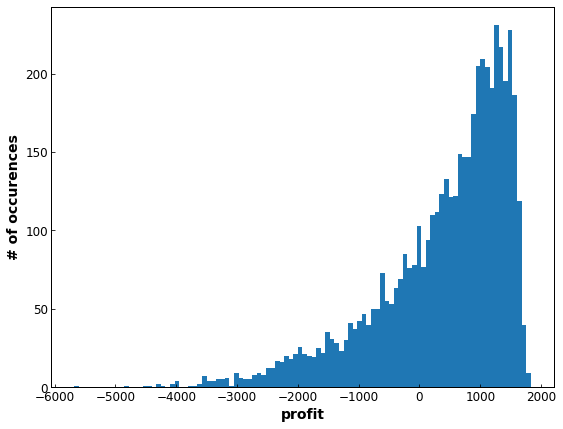

In [6]:
# Plot histogram of profits over all simulations
fig, ax = plt.subplots(1,1,figsize=(9,7))

count, bins, ignored = ax.hist(profit, bins=100)

# Set axes labels and legends
ax.set_xlabel('profit')
ax.set_ylabel('# of occurences')

plt.show()